In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from helper_functions import draw_boxplots, draw_correlation_heatmap, draw_hist, draw_pairplot, handle_outliers

In [20]:
print(os.listdir("../Input"))

['Life Expectancy Data.csv', 'Test', 'Train']


# **1 &nbsp;&nbsp;&nbsp; Load Data**

In [21]:
df = pd.read_csv("../Input/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# **2 &nbsp;&nbsp;&nbsp; Preprocess Data**

## **2.1 &nbsp;&nbsp;&nbsp; Show Data Info**

In [23]:
print("Data length:", len(df))
print("Data shape:", df.shape)

Data length: 2938
Data shape: (2938, 22)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## **2.2 &nbsp;&nbsp;&nbsp; Transform Data**

In [25]:
df['Status'] = df['Status'].astype('category').cat.codes
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [26]:
df.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,0.825732,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,0.379405,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,1.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,1.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,1.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## **2.3 &nbsp;&nbsp;&nbsp; Handle Duplicated Rows**

In [27]:
print("Duplicate rows:",  len(df) - len(df.duplicated()))

Duplicate rows: 0


## **2.4 &nbsp;&nbsp;&nbsp; Handle Missing Values**

In [28]:
print("Missing values:")
print(df.isna().sum())

Missing values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [29]:
# Fill missing values with columns median
for column in df.columns[df.isna().any(axis=0)]:
    df[column].fillna(df[column].median(), inplace=True)

df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [30]:
df.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.825732,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,...,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,0.379405,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,...,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,1.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,...,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,1.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,1.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,...,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## **2.5 &nbsp;&nbsp;&nbsp; Handle Outliers**

### **2.5.1 &nbsp;&nbsp;&nbsp; Before Handling**

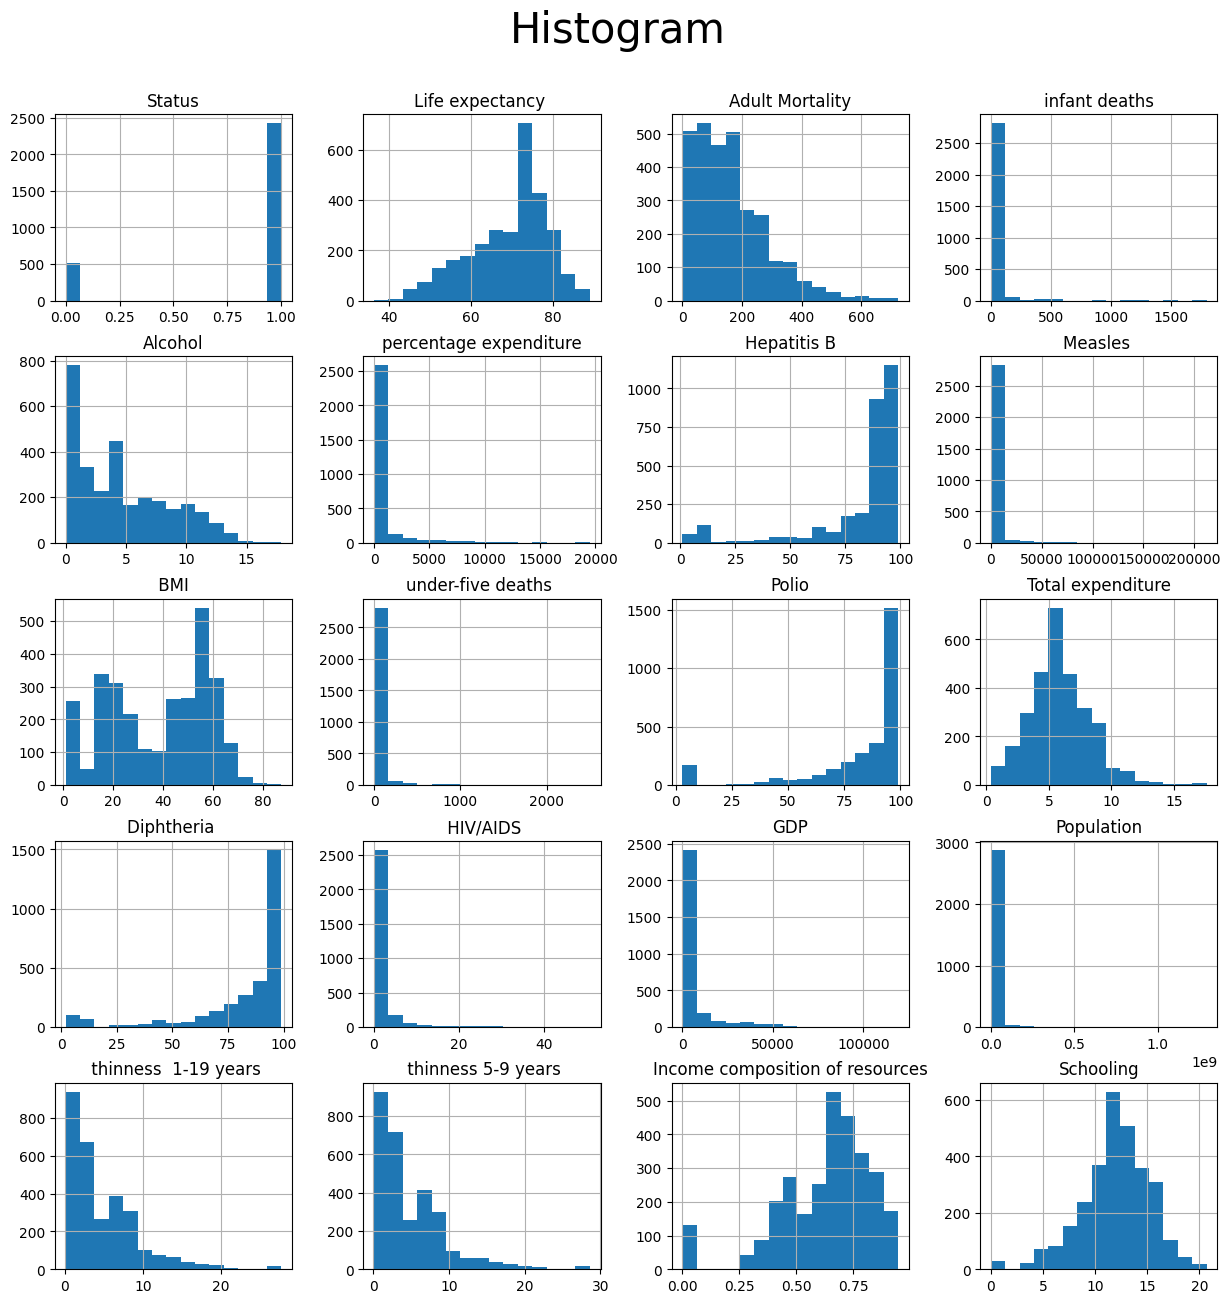

In [31]:
draw_hist(df.drop(columns=["Country", "Year"]))

**Các biến có sự phân phối không đều**

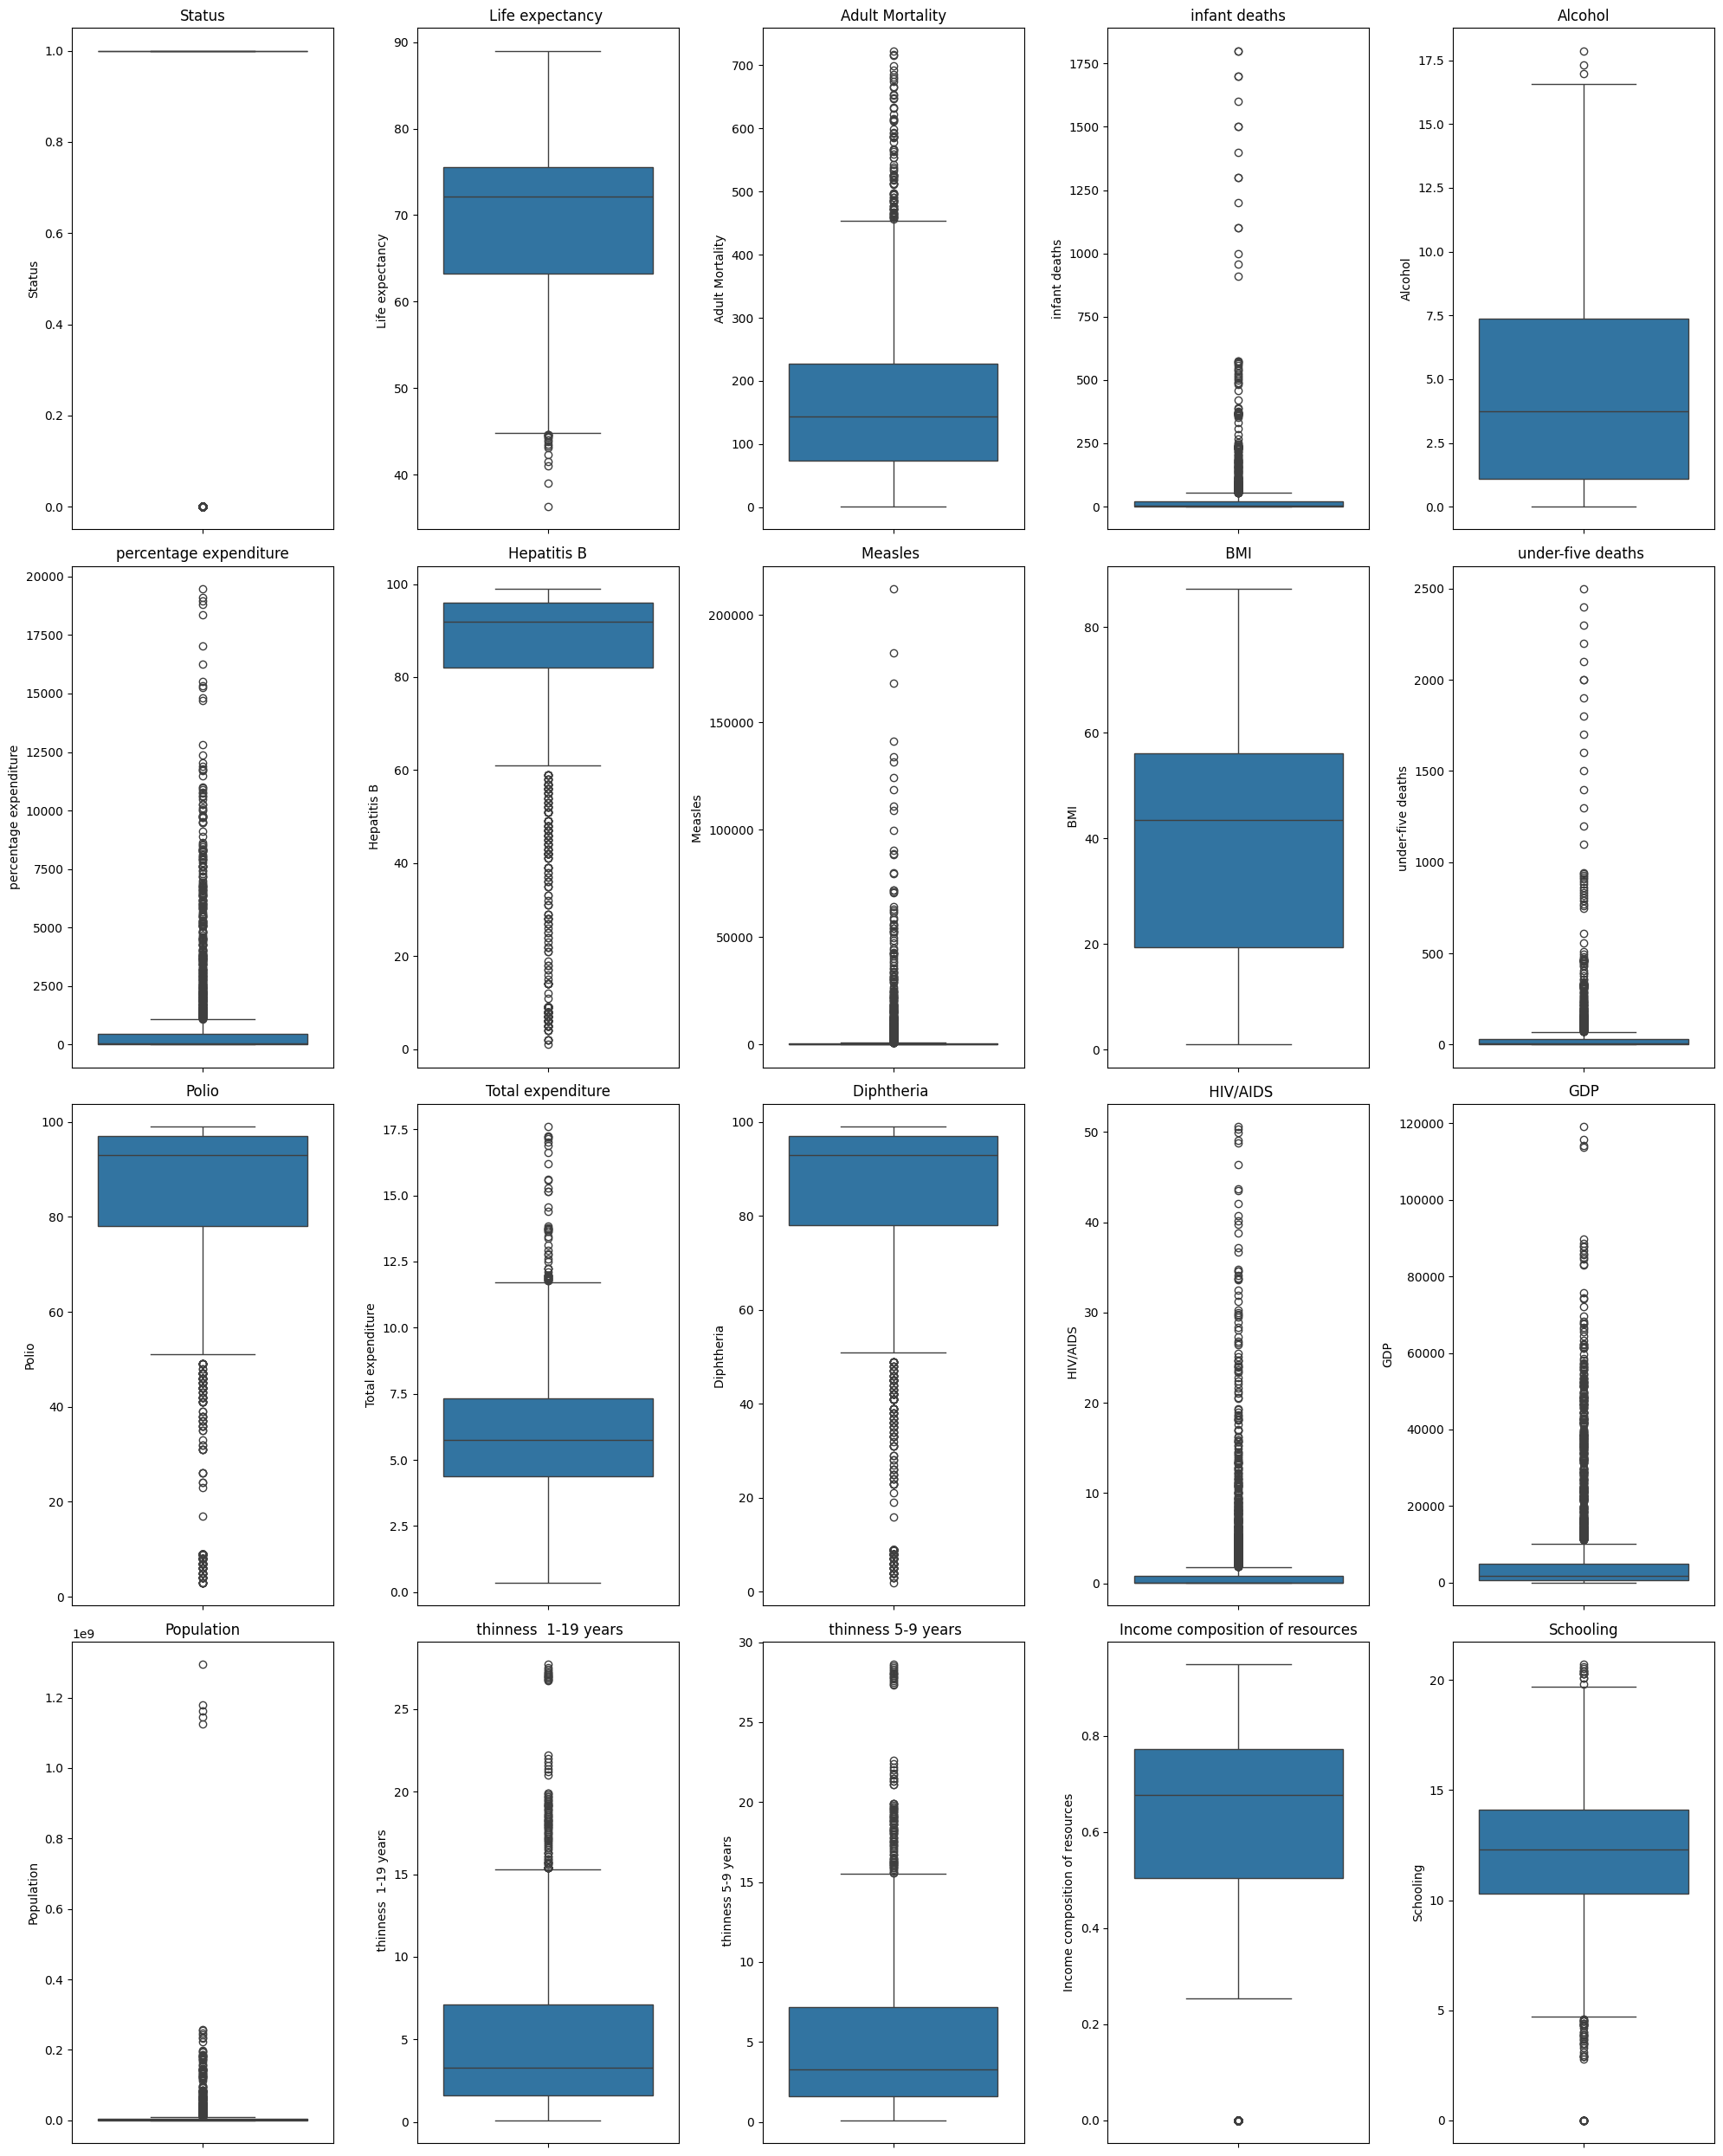

In [32]:
draw_boxplots(4, 5, df.drop(columns=["Country", "Year"]))

**Có nhiều giá trị ngoại lai xuất hiện trong tập dữ liệu**

In [33]:
df.skew(numeric_only=True).sort_values()

Hepatitis B                        -2.281697
Polio                              -2.108909
Diphtheria                         -2.083566
Status                             -1.718238
Income composition of resources    -1.212526
Life expectancy                    -0.642391
Schooling                          -0.635052
 BMI                               -0.229157
Year                               -0.006409
Alcohol                             0.649578
Total expenditure                   0.661108
Adult Mortality                     1.177899
 thinness  1-19 years               1.729496
 thinness 5-9 years                 1.795694
GDP                                 3.543756
percentage expenditure              4.652051
 HIV/AIDS                           5.396112
Measles                             9.441332
under-five deaths                   9.495065
infant deaths                       9.786963
Population                         17.972837
dtype: float64

**Dữ liệu lệch khá nặng về bên phải nên sẽ phải xử lý**

In [34]:
handle_outliers_cols = df.drop(columns=["Country", "Year", "Status", "Life expectancy "])
handle_outliers(handle_outliers_cols, df)

### **2.5.2 &nbsp;&nbsp;&nbsp; After Handling**

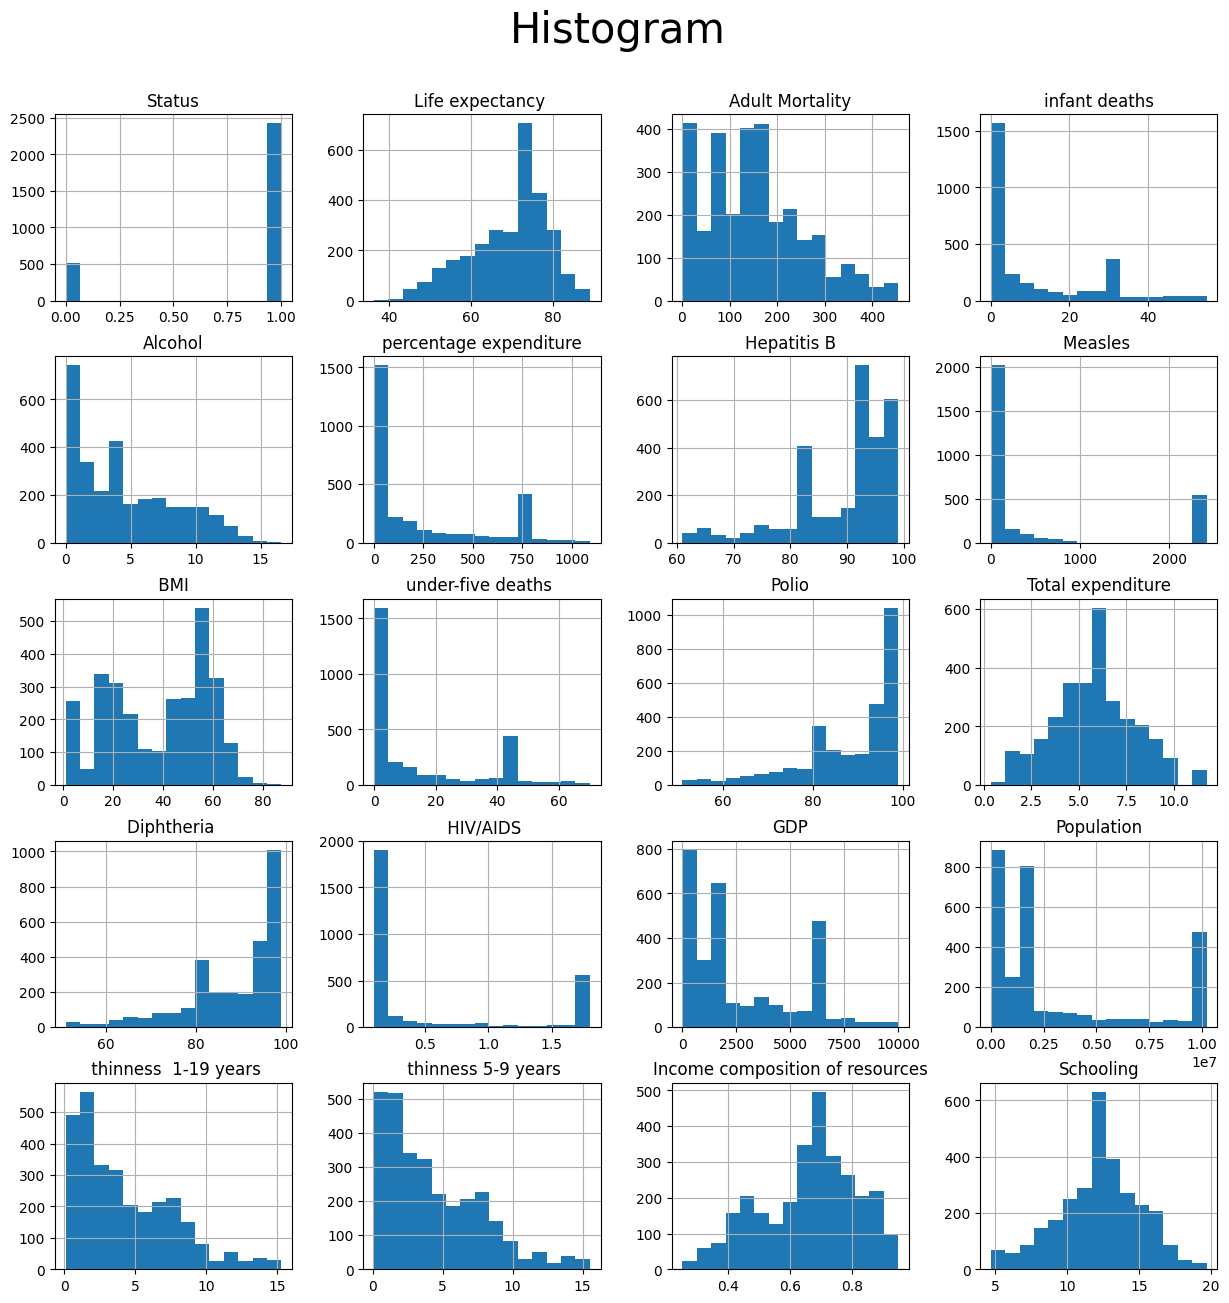

In [35]:
draw_hist(df.drop(columns=["Country", "Year"]))

**Đã có thay đổi trong phân phối dữ liệu**

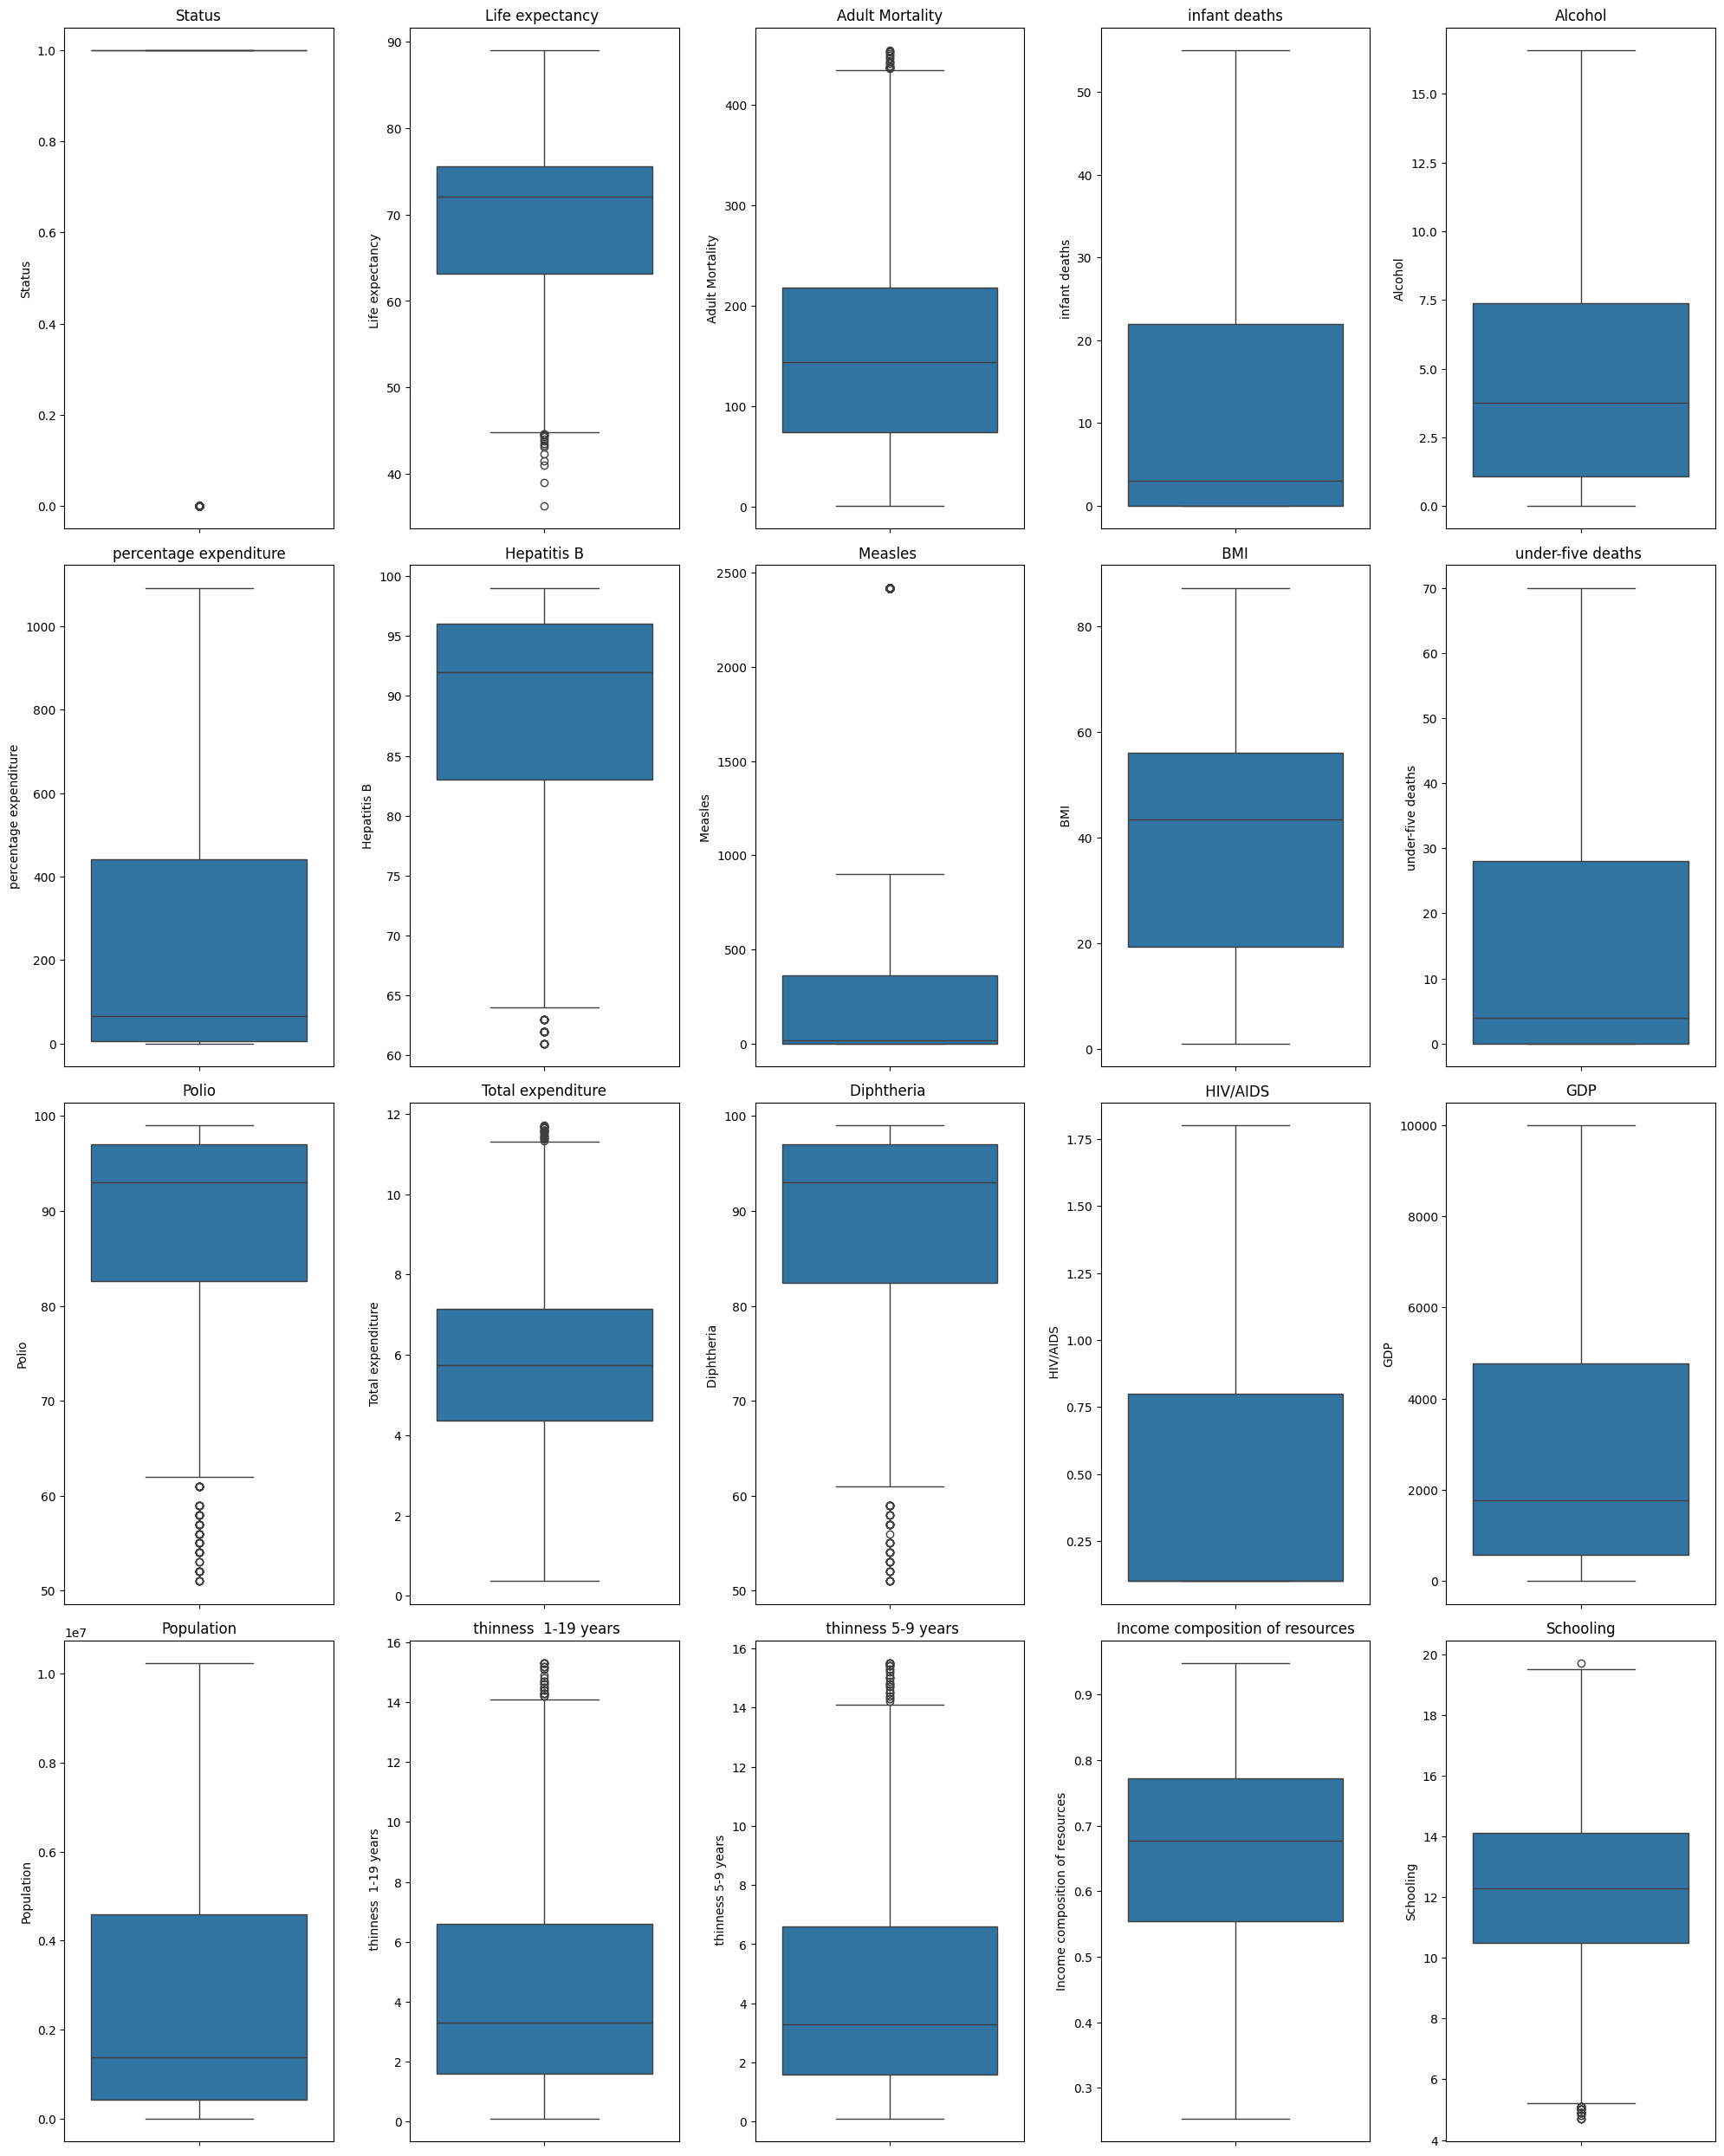

In [36]:
draw_boxplots(4, 5, df.drop(columns=["Country", "Year"]))

**Các giá trị ngoại lai đã giảm đáng kể**

In [37]:
df.skew(numeric_only=True)

Year                              -0.006409
Status                            -1.718238
Life expectancy                   -0.642391
Adult Mortality                    0.646519
infant deaths                      1.210452
Alcohol                            0.633932
percentage expenditure             1.033098
Hepatitis B                       -1.283816
Measles                            1.531992
 BMI                              -0.229157
under-five deaths                  1.076820
Polio                             -1.286749
Total expenditure                  0.132951
Diphtheria                        -1.248972
 HIV/AIDS                          1.183418
GDP                                0.796406
Population                         1.147666
 thinness  1-19 years              0.961490
 thinness 5-9 years                0.968420
Income composition of resources   -0.377994
Schooling                         -0.244382
dtype: float64

# **3 &nbsp;&nbsp;&nbsp; Visualize Data**

## **3.1 &nbsp;&nbsp;&nbsp; Correlation Heatmap**

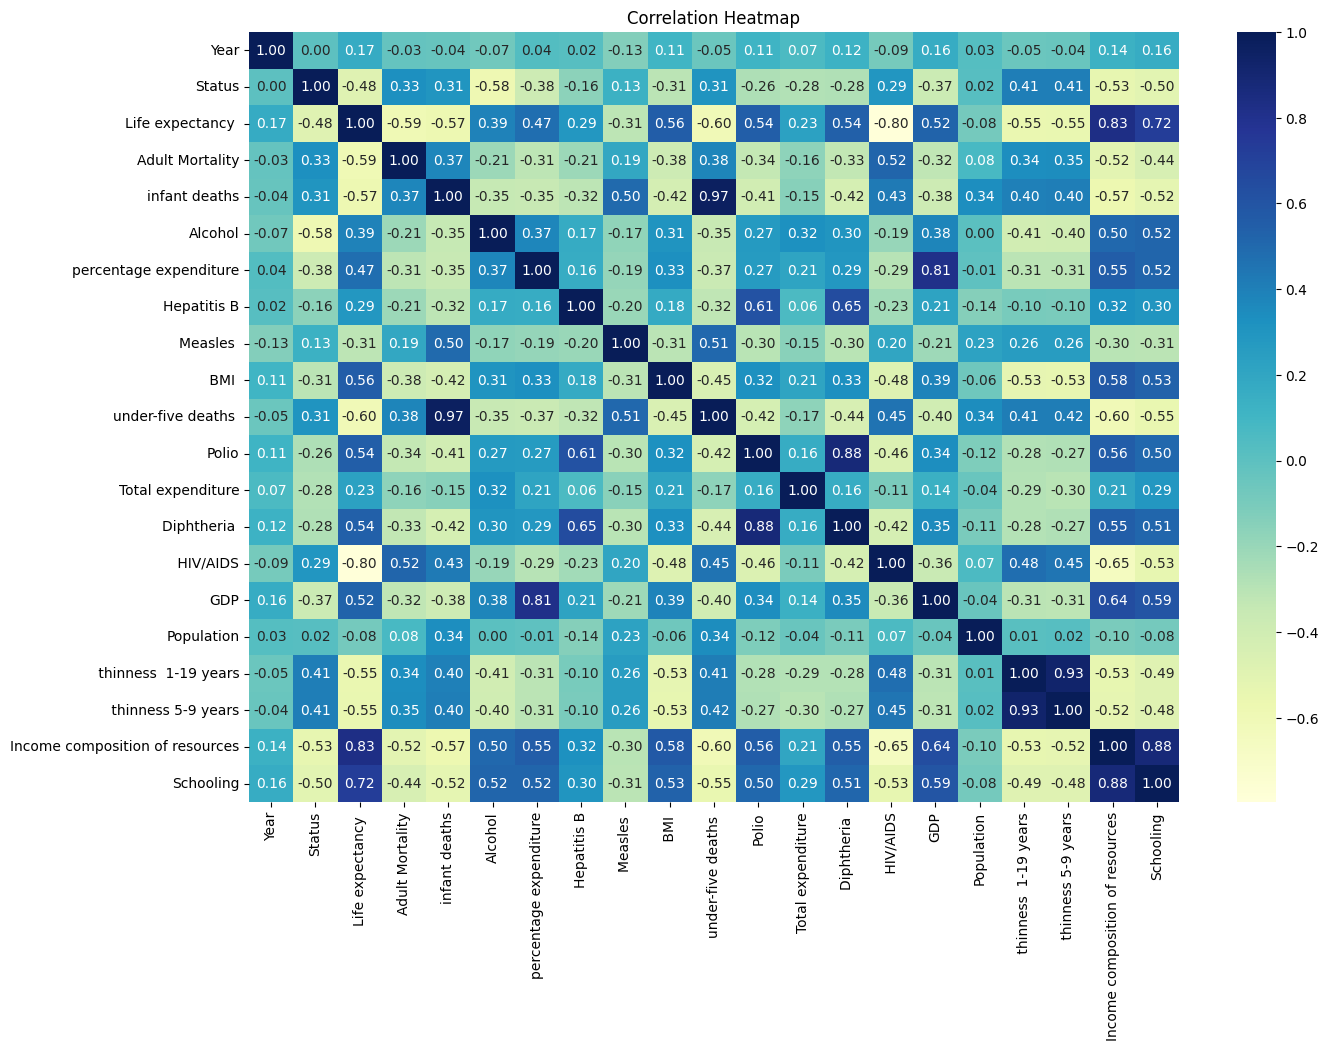

In [38]:
draw_correlation_heatmap(df)

## **3.2 &nbsp;&nbsp;&nbsp; Pairplot**

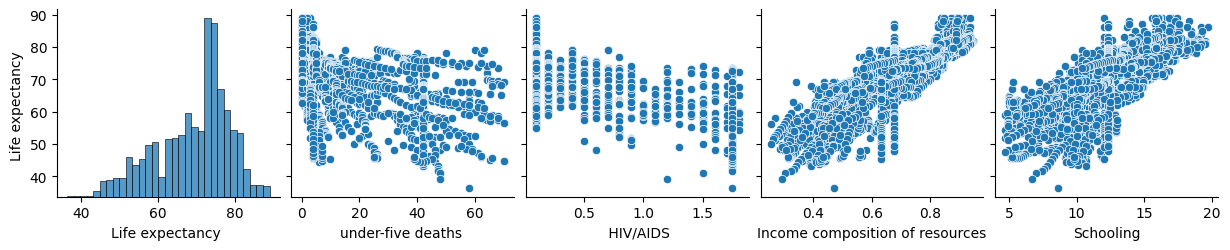

In [39]:
corr_matrix = df.corr(numeric_only=True)["Life expectancy "]
index = corr_matrix[abs(corr_matrix) > 0.6].index.tolist()
features = df[index]
draw_pairplot(features, "Life expectancy ")

# **4 &nbsp;&nbsp;&nbsp; Prepare Train and Test Set**

## **4.1 &nbsp;&nbsp;&nbsp; Split Train Test Set**

In [40]:
# Shuffle Data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [41]:
# Split Train and Test
n = int(0.8 * len(df))
train_df = df.iloc[:n]
test_df = df.iloc[n:]
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (2350, 22)
Test shape: (588, 22)


# **5 &nbsp;&nbsp;&nbsp; Write to File**

In [44]:
train_df.to_csv("../Input/Train/train.csv", index=False, encoding="utf-8")

In [45]:
test_df.to_csv("../Input/Test/test.csv", index=False, encoding="utf-8")